<a href="https://colab.research.google.com/github/rimi-1234/documentation/blob/main/Cse366_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchvision import datasets, transforms
transform = transforms.Compose([
transforms.Resize((128, 128)),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(),
transforms.RandomRotation(30),
transforms.ColorJitter(brightness=0.4, contrast=0.4,
saturation=0.4, hue=0.1),
transforms.RandomAffine(degrees=15, translate=(0.1, 0.1),
scale=(0.9, 1.1)),
transforms.RandomGrayscale(p=0.2),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229,
0.224, 0.225])
])
dataset = datasets.ImageFolder(root='/content/drive/MyDrive/101_ObjectCategories/101_ObjectCategories',
transform=transform)

In [ ]:
print(f"Number of classes in dataset: {len(dataset.classes)}")
print("Classes:", dataset.classes)  # List all class names


Number of classes in dataset: 102
Classes: ['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'sciss

In [ ]:
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_data, val_data, test_data = random_split(dataset, [train_size,
val_size, test_size])

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import vgg19

# Load pre-trained VGG19 model
model = vgg19(pretrained=True)

# Modify the classifier's final layer for 102 classes
model.classifier[6] = nn.Linear(in_features=4096, out_features=102)

# Print the modified classifier to verify
print(model.classifier)



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=102, bias=True)
)


In [ ]:
from torchvision.models import resnet50
model = resnet50(pretrained=True)
model.fc = nn.Linear(2048, 102) # Adjust the final layer for 101


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0

# Load the pre-trained EfficientNet-B0 model
model = efficientnet_b0(pretrained=True)

# Modify the final fully connected layer for 101 classes
model.classifier[1] = nn.Linear(1280, 102)  # Adjust the final layer for 101 categories



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)  # Optimizer for training


In [ ]:
for epoch in range(10):  # Loop over the dataset multiple times
    model.train()  # Set the model to training mode

    for images, labels in train_loader:  # Iterate over the training data
        optimizer.zero_grad()  # Clear previous gradients

        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters


In [ ]:
model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        # Compute validation metrics

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import ParameterGrid

param_grid = {
    'lr': [0.1, 0.01, 0.001],
    'batch_size': [16, 32, 64]
}
best_params = None
best_accuracy = 0

for params in ParameterGrid(param_grid):
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    train_loader = DataLoader(train_data, batch_size=params['batch_size'], shuffle=True)

print(f"Best Params: {best_params}")




Best Params: None


In [ ]:
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        # Compute test metrics

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[17  2  0 ...  0  0  0]
 [ 0 30  5 ...  0  0  0]
 [ 0  4 36 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  6]]


In [ ]:
import torch
from sklearn.metrics import confusion_matrix

y_pred = []
y_true = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Ensure numpy conversion happens on CPU
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Debugging outputs
num_unique_y_true = len(set(y_true))
num_unique_y_pred = len(set(y_pred))

print("Unique labels in y_true:", num_unique_y_true if num_unique_y_true == 102 else f"Expected 102, but found {num_unique_y_true}")
print("Unique labels in y_pred:", num_unique_y_pred if num_unique_y_pred == 102 else f"Expected 102, but found {num_unique_y_pred}")
print("Min label in y_true:", min(y_true), "Max label in y_true:", max(y_true))

# Ensure label consistency before generating confusion matrix
if num_unique_y_true == 102 and num_unique_y_pred <= 102:
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
else:
    print("Error: Mismatch in label distribution. Check dataset and predictions.")



Unique labels in y_true: Expected 102, but found 99
Unique labels in y_pred: Expected 102, but found 99
Min label in y_true: 0 Max label in y_true: 101
Error: Mismatch in label distribution. Check dataset and predictions.


In [ ]:
expected_labels = set(range(102))  # Expected labels from 0 to 101
missing_labels = expected_labels - set(y_true)

print("Missing labels in y_true:", missing_labels)



Missing labels in y_true: {65, 19, 29}


In [ ]:
for missing_label in missing_labels:
    y_true.append(missing_label)
    y_pred.append(missing_label)  # Assigning a dummy correct prediction


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=dataset.classes))

                   precision    recall  f1-score   support

BACKGROUND_Google       0.47      0.30      0.37        50
            Faces       0.75      0.89      0.81        37
       Faces_easy       0.88      0.90      0.89        41
         Leopards       0.50      1.00      0.67        19
       Motorbikes       0.88      0.95      0.91        77
        accordion       1.00      0.33      0.50         6
        airplanes       0.72      0.86      0.78        80
           anchor       0.67      0.33      0.44         6
              ant       0.00      0.00      0.00         6
           barrel       1.00      0.62      0.77         8
             bass       0.00      0.00      0.00         6
           beaver       0.50      0.29      0.36         7
        binocular       0.00      0.00      0.00         1
           bonsai       0.48      0.83      0.61        12
            brain       0.75      0.75      0.75         8
     brontosaurus       0.00      0.00      0.00       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch

def top_k_accuracy(output, target, k=5):
    with torch.no_grad():
        max_k_preds = torch.topk(output, k, dim=1).indices
        correct = max_k_preds.eq(target.view(-1, 1).expand_as(max_k_preds))
        return correct.any(dim=1).float().mean().item()  # Correctly indented


In [ ]:
torch.save(model.state_dict(), "final_model.pth")
print("✅ Model saved successfully as `final_model.pth`")



✅ Model saved successfully as `final_model.pth`


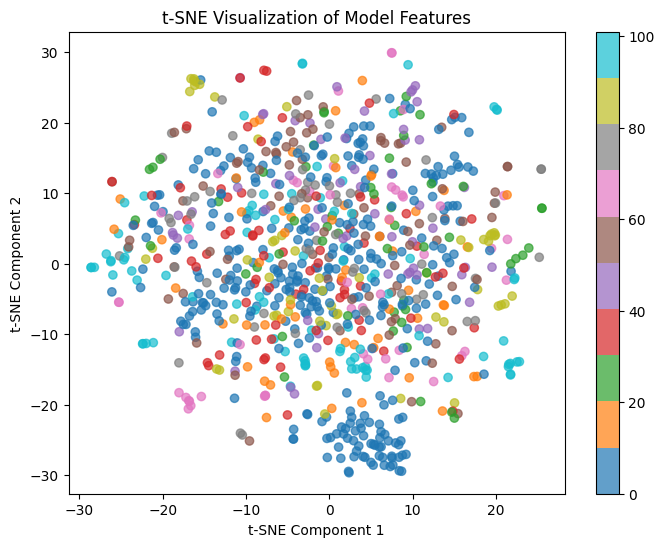

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Initialize lists to store features and labels
features = []
labels_list = []

# Set model to evaluation mode
model.eval()

# Collect features from the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)  # Move images to the correct device
        output = model(images)  # Get model predictions

        features.append(output.cpu().detach())  # Move to CPU and detach
        labels_list.append(labels.cpu())  # Move to CPU

# Convert collected tensors to numpy arrays
features = torch.cat(features).numpy()
labels_list = torch.cat(labels_list).numpy()

# Apply TSNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features)

# Plot the TSNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_list, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title("t-SNE Visualization of Model Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [ ]:
pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s e

In [ ]:
!pip install --upgrade pip
!pip install torch torchvision torchaudio
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Us

Adjusting classifier from 101 to 102 classes


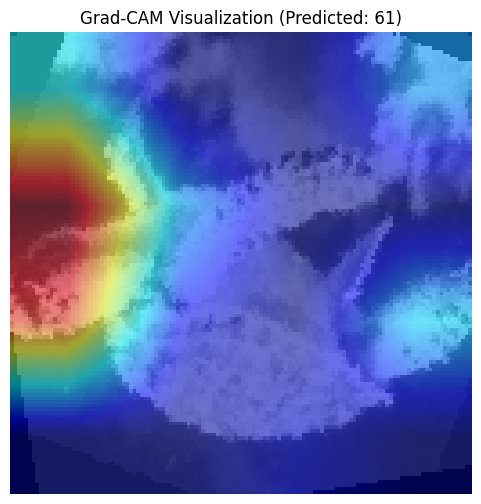

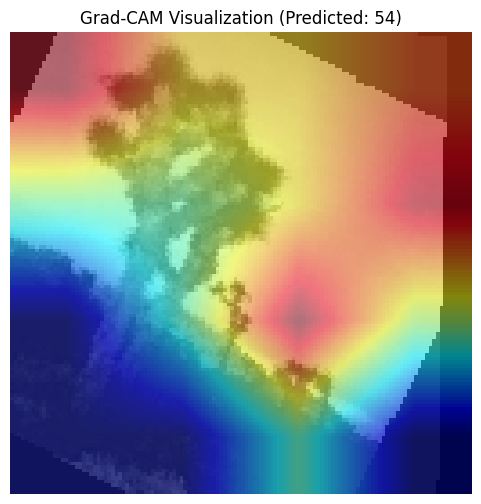

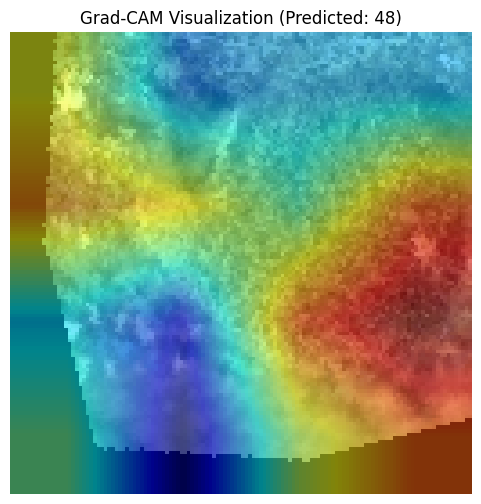

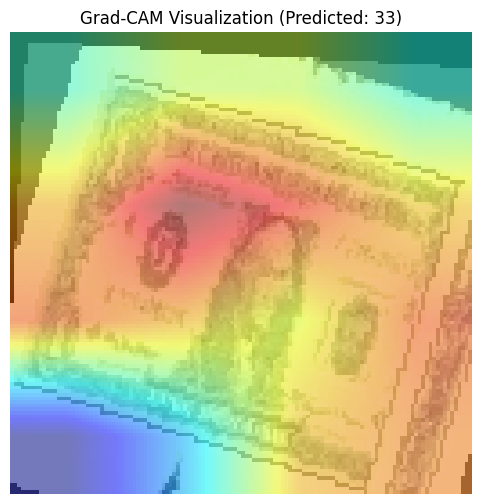

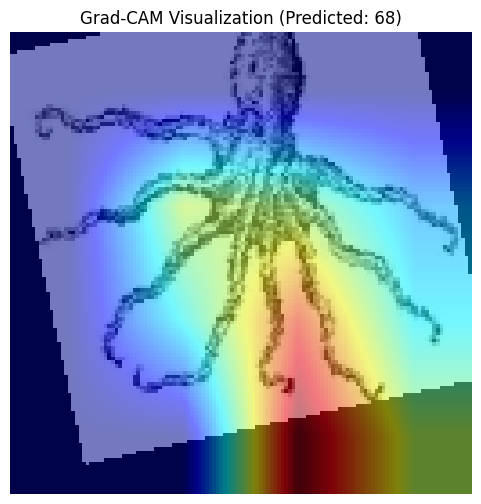

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from torchvision.models import efficientnet_b0, resnet50

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Choose the correct model (EfficientNet or ResNet)
use_efficientnet = True  # Change to False if using ResNet

if use_efficientnet:
    model = efficientnet_b0(weights="EfficientNet_B0_Weights.IMAGENET1K_V1")
    num_ftrs = model.classifier[1].in_features  # Get the input features of the classifier
    model.classifier[1] = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.features[-1]  # EfficientNet last convolutional layer
else:
    model = resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.layer4[-1]  # ResNet last convolutional layer

# Load model weights safely
checkpoint = torch.load("final_model.pth", map_location=device, weights_only=True)

# Check if the classifier needs adjustment
saved_classifier_shape = checkpoint['classifier.1.weight'].shape[0]
current_classifier_shape = model.classifier[1].out_features

if saved_classifier_shape != current_classifier_shape:
    print(f"Adjusting classifier from {current_classifier_shape} to {saved_classifier_shape} classes")
    model.classifier[1] = torch.nn.Linear(num_ftrs, saved_classifier_shape)  # Adjust to match saved model

model.load_state_dict(checkpoint)
model.to(device)
model.eval()  # Keep model in evaluation mode

# Initialize Grad-CAM
cam = GradCAM(model=model, target_layers=[target_layer])

# Get a batch of images from the test loader
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Generate Grad-CAM visualizations for the first 5 images in the batch
for i in range(min(5, len(images))):
    # Enable gradient tracking for the selected image
    images[i].requires_grad = True

    # Define target category for Grad-CAM (Predicted class)
    with torch.enable_grad():
        output = model(images[i:i+1])  # Select one image
        predicted_class = output.argmax(dim=1)[0].item()  # Get the predicted class
        targets = [ClassifierOutputTarget(predicted_class)]  # Define target

        # Compute Grad-CAM
        grayscale_cam = cam(input_tensor=images[i:i+1], targets=targets)[0]

    # Convert image for visualization
    image_np = images[i].detach().cpu().permute(1, 2, 0).numpy()  # Convert CHW to HWC
    image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())  # Normalize

    # Overlay Grad-CAM heatmap on image
    cam_image = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

    # Display the Grad-CAM visualization
    plt.figure(figsize=(6, 6))
    plt.imshow(cam_image)
    plt.axis("off")
    plt.title(f"Grad-CAM Visualization (Predicted: {predicted_class})")
    plt.show()



Adjusting classifier from 101 to 102 classes


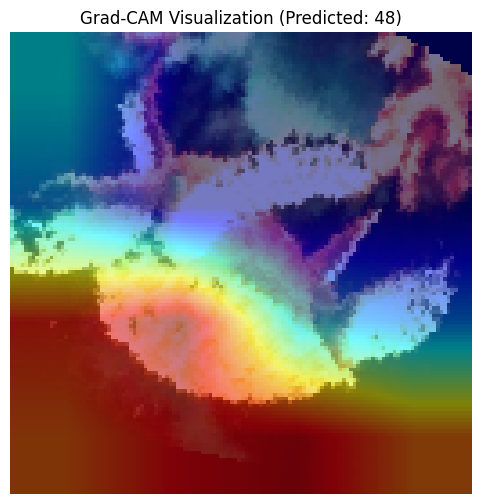

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from torchvision.models import efficientnet_b0, resnet50

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Choose the correct model (EfficientNet or ResNet)
use_efficientnet = True  # Change to False if using ResNet

if use_efficientnet:
    model = efficientnet_b0(weights="EfficientNet_B0_Weights.IMAGENET1K_V1")
    num_ftrs = model.classifier[1].in_features  # Get the input features of the classifier
    model.classifier[1] = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.features[-1]  # EfficientNet last convolutional layer
else:
    model = resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.layer4[-1]  # ResNet last convolutional layer

# Load model weights safely (set weights_only=True to prevent security risks)
checkpoint = torch.load("final_model.pth", map_location=device, weights_only=True)

# Check if the classifier needs adjustment
saved_classifier_shape = checkpoint['classifier.1.weight'].shape[0]  # Get the saved output size
current_classifier_shape = model.classifier[1].out_features

if saved_classifier_shape != current_classifier_shape:
    print(f"Adjusting classifier from {current_classifier_shape} to {saved_classifier_shape} classes")
    model.classifier[1] = torch.nn.Linear(num_ftrs, saved_classifier_shape)  # Adjust to match saved model

model.load_state_dict(checkpoint)
model.to(device)
model.eval()  # Keep model in evaluation mode

# Initialize Grad-CAM
cam = GradCAM(model=model, target_layers=[target_layer])

# Get a single batch from the test loader
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)  # Move to the correct device

# Enable gradient tracking
images.requires_grad = True

# Define target category for Grad-CAM (Predicted class)
with torch.enable_grad():
    output = model(images)
    predicted_class = output.argmax(dim=1)[0].item()  # ✅ Fixed - Select first image prediction
    targets = [ClassifierOutputTarget(predicted_class)]  # Define target

    # Compute Grad-CAM
    grayscale_cam = cam(input_tensor=images, targets=targets)[0]

# Convert image for visualization (Fixed: Use .detach().cpu().numpy() to avoid errors)
image_np = images[0].detach().cpu().permute(1, 2, 0).numpy()  # Convert CHW to HWC
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())  # Normalize

# Overlay Grad-CAM heatmap on image
cam_image = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

# Display the Grad-CAM visualization
plt.figure(figsize=(6, 6))
plt.imshow(cam_image)
plt.axis("off")
plt.title(f"Grad-CAM Visualization (Predicted: {predicted_class})")
plt.show()



Adjusting classifier from 101 to 102 classes
efficientnet_b0 Training Loss: 1.1765, efficientnet_b0 Training Accuracy: 70.24%
efficientnet_b0 Validation Loss: 1.5335, efficientnet_b0 alidation Accuracy: 61.93%


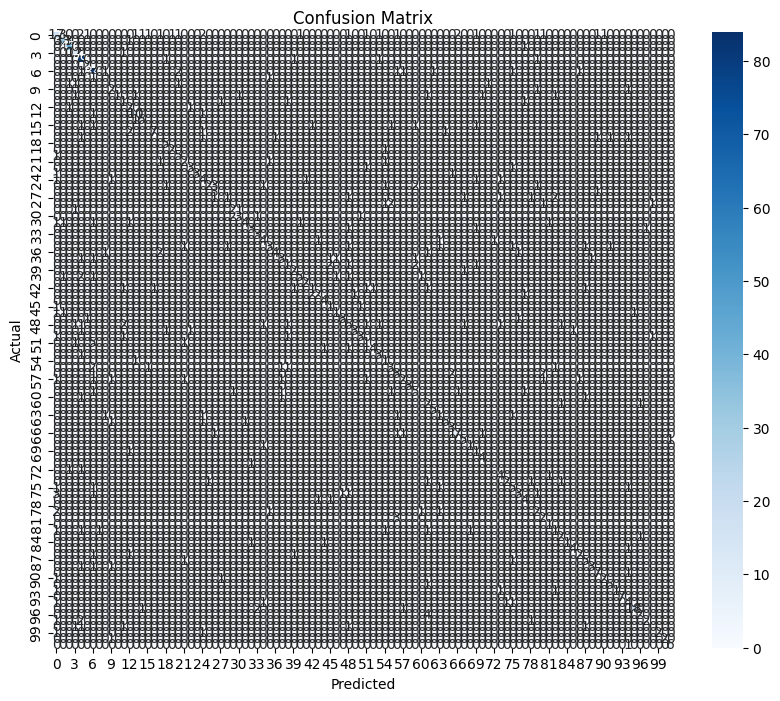


Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.39      0.42        44
           1       0.77      0.89      0.82        37
           2       0.88      0.90      0.89        48
           3       0.67      0.92      0.77        13
           4       0.81      0.95      0.88        83
           5       0.50      1.00      0.67         2
           6       0.81      0.90      0.85        93
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
           9       0.29      0.50      0.36         4
          10       1.00      0.14      0.25         7
          11       0.14      0.25      0.18         4
          12       0.25      0.50      0.33         4
          13       0.71      0.83      0.77        12
          14       0.75      0.86      0.80         7
          15       0.00      0.00      0.00         6
          16       0.88      0.64      0.74        11
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from torchvision.models import efficientnet_b0, resnet50
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Choose the correct model (EfficientNet or ResNet)
use_efficientnet = True  # Change to False if using ResNet

if use_efficientnet:
    model = efficientnet_b0(weights="EfficientNet_B0_Weights.IMAGENET1K_V1")
    num_ftrs = model.classifier[1].in_features  # Get the input features of the classifier
    model.classifier[1] = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.features[-1]  # EfficientNet last convolutional layer
else:
    model = resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.layer4[-1]  # ResNet last convolutional layer

# Load model weights safely
checkpoint = torch.load("final_model.pth", map_location=device, weights_only=True)

# Check if classifier adjustment is needed
saved_classifier_shape = checkpoint['classifier.1.weight'].shape[0]  # Get the saved output size
current_classifier_shape = model.classifier[1].out_features

if saved_classifier_shape != current_classifier_shape:
    print(f"Adjusting classifier from {current_classifier_shape} to {saved_classifier_shape} classes")
    model.classifier[1] = torch.nn.Linear(num_ftrs, saved_classifier_shape)  # Adjust to match saved model

model.load_state_dict(checkpoint)
model.to(device)
model.eval()  # Keep model in evaluation mode

# Function to compute accuracy and loss
def evaluate_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)

    return avg_loss, accuracy, all_labels, all_preds

# Assuming you have train_loader and val_loader defined
criterion = torch.nn.CrossEntropyLoss()

# Evaluate on Training Set
train_loss, train_accuracy, _, _ = evaluate_model(model, train_loader, criterion)
print(f"efficientnet_b0 Training Loss: {train_loss:.4f}, efficientnet_b0 Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on Validation Set
val_loss, val_accuracy, y_true, y_pred = evaluate_model(model, val_loader, criterion)
print(f"efficientnet_b0 Validation Loss: {val_loss:.4f}, efficientnet_b0 alidation Accuracy: {val_accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))


In [ ]:
import torch
from torchvision import models

# Load the correct EfficientNet variant (change to match your trained model)
model = models.efficientnet_b0(pretrained=False)  # Change to the correct variant (b0, b1, etc.)

# Get device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load checkpoint safely
checkpoint = torch.load("final_model.pth", map_location=device)

# Get model's current state_dict
model_state_dict = model.state_dict()

# Filter out mismatched keys
filtered_checkpoint = {k: v for k, v in checkpoint.items() if k in model_state_dict and model_state_dict[k].shape == v.shape}

# Update model with matching parameters
model_state_dict.update(filtered_checkpoint)
model.load_state_dict(model_state_dict, strict=False)  # strict=False to allow partial loading

# Fix classifier layer if necessary
num_features = model.classifier[1].in_features  # Get input features
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(num_features, 102)  # Ensure output classes match
)

# Move model to device
model.to(device)
model.eval()  # Set to evaluation mode

print("Model successfully loaded with matching parameters.")




Model successfully loaded with matching parameters.


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-184-a6700cf988a7>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functio

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Expected key 'fc.weight' not found in the checkpoint. Inspecting checkpoint...
odict_keys(['features.0.0.weight', 'features.0.1.weight', 'features.0.1.bias', 'features.0.1.running_mean', 'features.0.1.running_var', 'features.0.1.num_batches_tracked', 'features.1.0.block.0.0.weight', 'features.1.0.block.0.1.weight', 'features.1.0.block.0.1.bias', 'features.1.0.block.0.1.running_mean', 'features.1.0.block.0.1.running_var', 'features.1.0.block.0.1.num_batches_tracked', 'features.1.0.block.1.fc1.weight', 'features.1.0.block.1.fc1.bias', 'features.1.0.block.1.fc2.weight', 'features.1.0.block.1.fc2.bias', 'features.1.0.block.2.0.weight', 'features.1.0.block.2.1.weight', 'features.1.0.block.2.1.bias', 'features.1.0.block.2.1.running_mean', 'features.1.0.block.2.1.running_var', 'features.1.0.block.2.1.num_batches_tracked', 'features.2.0.block.0.0.weight', 'features.2.0.block.0.1.weight', 'features.2.0.block.0.1.bias', 'features.2.0.block.0.1.running_mean', 'features.2.0.block.0.1.running_var',

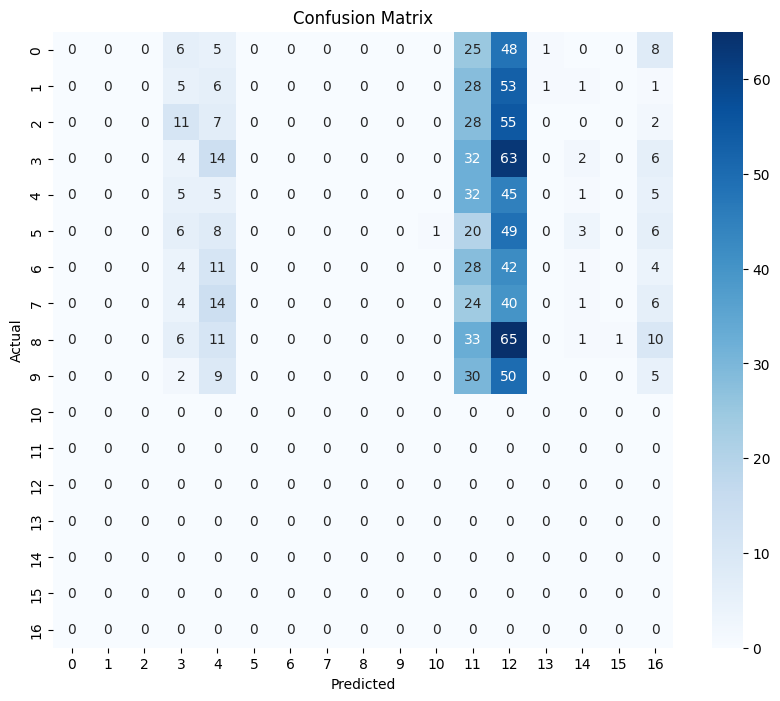


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00       103
           3       0.08      0.03      0.05       121
           4       0.06      0.05      0.05        93
           5       0.00      0.00      0.00        93
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00       127
           9       0.00      0.00      0.00        96
          17       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         0
          54       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         0

 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from torchvision.models import efficientnet_b0, resnet50

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Choose the correct model (EfficientNet or ResNet)
use_efficientnet = False  # Change to False if using ResNet

if use_efficientnet:
    model = efficientnet_b0(weights="EfficientNet_B0_Weights.IMAGENET1K_V1")
    num_ftrs = model.classifier[1].in_features  # Get the input features of the classifier
    model.classifier[1] = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes
    target_layer = model.features[-1]  # EfficientNet last convolutional layer
else:
    model = resnet50(pretrained=True)  # Use ResNet
    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, 101)  # Set to 101 classes (adjust this to your dataset)
    target_layer = model.layer4[-1]  # ResNet last convolutional layer

# Load model weights safely (set weights_only=True to prevent security risks)
checkpoint = torch.load("final_model.pth", map_location=device, weights_only=True)

# Check if classifier adjustment is needed for EfficientNet or ResNet
if use_efficientnet:
    # For EfficientNet, the classifier is model.classifier[1]
    saved_classifier_shape = checkpoint['classifier.1.weight'].shape[0]  # Get the saved output size
    current_classifier_shape = model.classifier[1].out_features  # Current classifier size

    # If the number of output features don't match, adjust the classifier
    if saved_classifier_shape != current_classifier_shape:
        print(f"Adjusting EfficientNet classifier from {current_classifier_shape} to {saved_classifier_shape} classes")
        model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, saved_classifier_shape)  # Adjust to match saved model
else:
    # For ResNet, use 'fc' for fully connected layer
    if 'fc.weight' in checkpoint:
        saved_classifier_shape = checkpoint['fc.weight'].shape[0]  # Get the saved output size for ResNet
    else:
        # In case the key does not exist in the checkpoint, inspect the model's structure to debug
        print("Expected key 'fc.weight' not found in the checkpoint. Inspecting checkpoint...")
        print(checkpoint.keys())  # Print all available keys in the checkpoint to help identify the correct one
        saved_classifier_shape = model.fc.out_features  # Default to current output shape if key is missing

    current_classifier_shape = model.fc.out_features  # Current classifier size for ResNet

    # If the number of output features don't match, adjust the classifier
    if saved_classifier_shape != current_classifier_shape:
        print(f"Adjusting ResNet classifier from {current_classifier_shape} to {saved_classifier_shape} classes")
        model.fc = torch.nn.Linear(model.fc.in_features, saved_classifier_shape)  # Adjust to match saved model

# Check the keys in the checkpoint to debug
print(checkpoint.keys())  # Print all keys to see if the names match

# Load the model weights
try:
    model.load_state_dict(checkpoint)
except RuntimeError as e:
    print(f"Error loading state_dict: {e}")
    print("Attempting to load with strict=False...")
    model.load_state_dict(checkpoint, strict=False)  # Load with strict=False to ignore mismatched keys
 #   # Keep model in evaluation mode



model.eval()  # Keep model in evaluation mode

def evaluate_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)

    return avg_loss, accuracy, all_labels, all_preds

# Assuming you have train_loader and val_loader defined
criterion = torch.nn.CrossEntropyLoss()

# Evaluate on Training Set
train_loss, train_accuracy, _, _ = evaluate_model(model, train_loader, criterion)
print(f"resnet50 Training Loss: {train_loss:.4f}, resnet50 Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on Validation Set
val_loss, val_accuracy, y_true, y_pred = evaluate_model(model, val_loader, criterion)
print(f"resnet50 Validation Loss: {val_loss:.4f}, resnet50 alidation Accuracy: {val_accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))



In [107]:
# Example: Lower the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  # Use a smaller learning rate



In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from torchvision import models
import torch.nn as nn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for RGB model
    transforms.Resize((128, 128)),  # Resize to the input size required by VGG19
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize like ImageNet
])

# Load the trained VGG19 model and modify for 102 classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.vgg19(pretrained=True)

# Update the final layer of the classifier to match your training setup.
# Make sure the number of output classes matches the number you used during training.
model.classifier[6] = nn.Linear(in_features=4096, out_features=102)  # Adjust the number of classes to your needs

# Load the state_dict (model weights) from the checkpoint.
checkpoint = torch.load('final_model.pth')

# Load the model weights into the model.
# Use strict=False to ignore any mismatched layers and load the compatible ones.
model.load_state_dict(checkpoint, strict=False)

# Now the model is ready for evaluation or further use.
model.eval()


# Assuming you have train_loader and val_loader defined (e.g., from datasets.ImageFolder)
# If not, ensure that train_loader and val_loader are provided as DataLoader objects
criterion = torch.nn.CrossEntropyLoss()

# Evaluate the model
def evaluate_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)

    return avg_loss, accuracy, all_labels, all_preds

# Assuming you have train_loader and val_loader already defined
# Example:
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Evaluate on Training Set
train_loss, train_accuracy, _, _ = evaluate_model(model, train_loader, criterion)
print(f"VGG19 Training Loss: {train_loss:.4f}, VGG19 Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on Validation Set
val_loss, val_accuracy, y_true, y_pred = evaluate_model(model, val_loader, criterion)
print(f"VGG19 Validation Loss: {val_loss:.4f}, VGG19 Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-108-aad9601e5a42>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). 

VGG19 Training Loss: 4.6592, VGG19 Training Accuracy: 0.00%


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()

